### Histogramas en Python

In [2]:
x = (0,1,1,1,2,2,3,7,7,7,25) # esto es una tupla inmutable

In [3]:
def count_elements(seq) -> dict:
    """"
    Funcion que cuenta las frecuencias
    de aparicion de cada elemento de la secuencia, 
    creando un diccionario como si fuese una 
    tabla de frecuencias
    """
    
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [4]:
fAbs = count_elements(x) # frecuencias absolutas

In [5]:
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [6]:
from collections import Counter

In [7]:
fAbs2 = Counter(x) # frecuencias absolutas

In [8]:
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [9]:
fAbs.items() == fAbs2.items() # Devuelve que es True, por ende tanto la version programada como la importada es la misma. 

True

In [11]:
def ascii_histogram(seq) -> None:
    """
    Un histograma de Frecuencias absolutas 
    colocado en horizontal y con caracteres ASCII
    """
    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k, '+'*fAbs[k]))

In [12]:
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [18]:
import random
random.seed(2019)

In [19]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [20]:
data = []
for k, v in zip(vals, freqs): # usamos zip para recorrer los dos arrays, las dos variables a la vez
    data.extend([k]*v)
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [22]:
ascii_histogram(data) # histograma de frecuencias a mano.

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


### Histogramas con NumPy

In [23]:
import numpy as np

In [24]:
np.random.seed(2019)

In [25]:
np.set_printoptions(precision = 3)

In [26]:
x = np.random.laplace(loc = 10, scale = 3, size = 1000)

In [27]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [31]:
hist, bin_edges= np.histogram(x)

In [32]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9])

In [34]:
bin_edges # estos son los intervalos de las ditribuciones de arriba

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [35]:
hist.size, bin_edges.size

(10, 11)

In [37]:
min_edge = x.min()
max_edge = x.max()

In [38]:
n_bins = 10
bin_edges = np.linspace(start = min_edge, stop = max_edge, num = n_bins+1, endpoint = True)

In [40]:
bin_edges # construccion a mano

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [43]:
x = (0,1,1,1,2,2,3,7,7,7,25) # esto es una tupla inmutable

In [44]:
bcount = np.bincount(x) # cambiando array al primero

In [46]:
bcount # hay que contrastarlo con el de arriba

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [47]:
hist, _ = np.histogram(x, range=(0, max(x)), bins = max(x)+1)

In [49]:
hist # da lo mismo que la programada

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [50]:
np.array_equal(bcount, hist)

True

In [51]:
dict(zip(np.unique(x), bcount[bcount.nonzero()]))

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

### Visualizacion de Histogramas con Matplotlib y Pandas

In [52]:
import matplotlib.pyplot as plt

In [53]:
np.random.seed(2019)
x = np.random.laplace(loc = 10, scale = 3, size = 1000)

(0.0, 140.0)

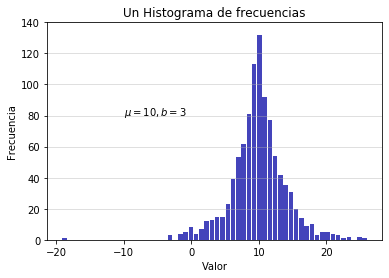

In [63]:
n, bins, patches = plt.hist(x = x, bins = "auto", #aqui puedo cambiar a 12 o puedo usar scott, friedman, etc. 
                            color = "#0505a5", alpha = 0.75, rwidth= 0.85)
plt.grid(axis = "y", alpha = 0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un Histograma de frecuencias")
plt.text(-10, 80, r'$\mu = 10, b = 3$')
maxfreq = n.max()
plt.ylim(ymax = np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq + 10)

In [58]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [59]:
bins

array([-19.167, -18.387, -17.606, -16.826, -16.046, -15.266, -14.486,
       -13.706, -12.926, -12.146, -11.366, -10.586,  -9.806,  -9.026,
        -8.246,  -7.466,  -6.685,  -5.905,  -5.125,  -4.345,  -3.565,
        -2.785,  -2.005,  -1.225,  -0.445,   0.335,   1.115,   1.895,
         2.675,   3.455,   4.236,   5.016,   5.796,   6.576,   7.356,
         8.136,   8.916,   9.696,  10.476,  11.256,  12.036,  12.816,
        13.596,  14.376,  15.157,  15.937,  16.717,  17.497,  18.277,
        19.057,  19.837,  20.617,  21.397,  22.177,  22.957,  23.737,
        24.517,  25.297,  26.077])

In [60]:
patches

<a list of 58 Patch objects>

In [64]:
import pandas as pd

In [65]:
size, scale = 1000, 10
data = pd.Series(np.random.gamma(scale, size = size))

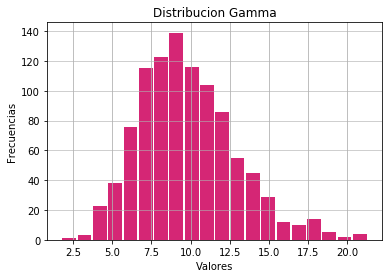

In [67]:
data.plot.hist(grid = True, bins = 20, rwidth = 0.9, color = "#d52675")
plt.title("Distribucion Gamma")
plt.xlabel("Valores")
plt.ylabel("Frecuencias")
plt.grid(axis = "y", alpha = 0.75)

### Funciones de densidad y de Probabilidad

In [68]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc = mu, scale = sigma, size = (1000, 2)), columns = ['x1', 'x2'])

In [69]:
dist.agg(['min', 'max', 'mean', 'std']).round(decimals = 2)

,x1,x2
min,-5.83,13.84
max,26.05,27.17
mean,9.96,19.89
std,4.97,1.96


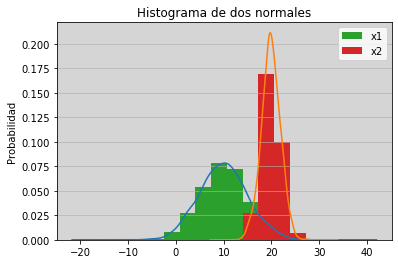

In [74]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend = False, title = "Histograma de dos normales")
dist.plot.hist(density = True, ax = ax)
ax.set_ylabel("Probabilidad")
ax.grid(axis = "y", alpha = 0.75)
ax.set_facecolor("#d5d5d5")

In [75]:
from scipy import stats

In [77]:
dist = stats.norm() # distribucion normal teorica N(0,1) ~ exp(-x**2/2)/sqrt(2*pi)

In [78]:
sample = dist.rvs(size = 1000)

In [79]:
stats.norm.ppf(0.01)

-2.3263478740408408

In [80]:
stats.norm.ppf(0.99)

2.3263478740408408

In [81]:
x = np.linspace(start = stats.norm.ppf(0.01), stop = stats.norm.ppf(0.99), num = 250)

In [82]:
gkde = stats.gaussian_kde(dataset = sample)

Text(-2.0, 0.35, '$f(x) = \\frac{e^{-x^2/2}}{\\sqrt{2\\pi}}$')

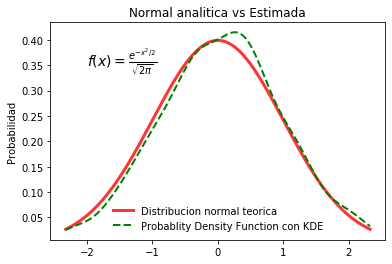

In [85]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle = "solid", c = "red", lw = 3, alpha = 0.8, label = "Distribucion normal teorica")
ax.plot(x, gkde.evaluate(x), linestyle = "dashed", c = "green", lw = 2, label = "Probablity Density Function con KDE")
ax.legend(loc = "best", frameon = False)
ax.set_title("Normal analitica vs Estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2., 0.35, r'$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$', fontsize = 14)

### Histogramas con Seaborn

In [87]:
import seaborn as sns
import pandas.util.testing as tm

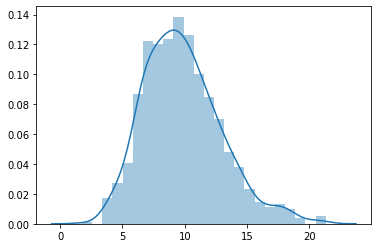

In [88]:
sns.distplot(data)

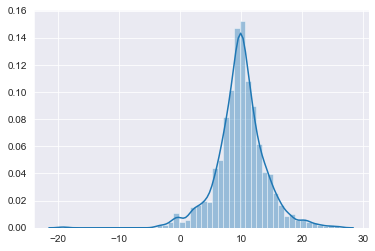

In [89]:
np.random.seed(2019)
x = np.random.laplace(loc = 10, scale = 3, size = 1000)
sns.set_style("darkgrid")
sns.distplot(x)

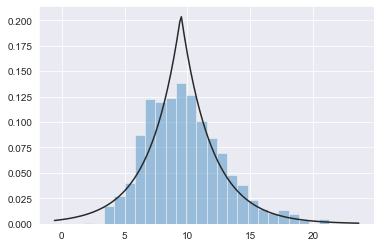

In [93]:
sns.distplot(data, fit = stats.laplace, kde = False) # para ver como se deberia de ajustar a una funcion dada.

### Otras formas

In [94]:
data2 = np.random.choice(np.arange(10), size = 10000, p = np.linspace(1,11,10)/60)

In [95]:
s = pd.Series(data2)

In [96]:
s.value_counts()

9    1840
8    1622
7    1478
6    1276
5    1050
4     909
3     781
2     537
1     361
0     146
dtype: int64

In [97]:
s.value_counts(normalize = True)

9    0.1840
8    0.1622
7    0.1478
6    0.1276
5    0.1050
4    0.0909
3    0.0781
2    0.0537
1    0.0361
0    0.0146
dtype: float64

### Distribuciones de Frecuencia, homologo de R.

In [99]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,20,25,30,40,51,52,70])
bins = (0,10,15,18,21, np.inf)
labels = ('infancia', 'preadolescencia', 'adolescencia', 'universitario', 'adulto')
groups = pd.cut(ages, bins = bins, labels = labels)

In [100]:
groups

0            infancia
1            infancia
2            infancia
3            infancia
4            infancia
5            infancia
6            infancia
7            infancia
8     preadolescencia
9     preadolescencia
10       adolescencia
11       adolescencia
12      universitario
13             adulto
14             adulto
15             adulto
16             adulto
17             adulto
18             adulto
dtype: category
Categories (5, object): [infancia < preadolescencia < adolescencia < universitario < adulto]

In [102]:
groups.value_counts()

infancia           8
adulto             6
adolescencia       2
preadolescencia    2
universitario      1
dtype: int64

In [105]:
pd.concat((ages, groups), axis = 1).rename(columns = {0:"age", 1:"group"})

,age,group
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia
